In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Generate Linearly Separable data

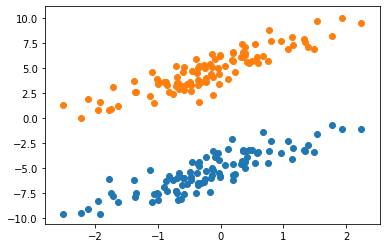

In [2]:
x_axis = np.random.randn(100,1);
y_axis_1 = 2*x_axis -5 + np.random.randn(100,1);
y_axis_2 = 2*x_axis + 5 + np.random.randn(100,1);
plt.scatter(x_axis,y_axis_1)
plt.scatter(x_axis,y_axis_2)

In [3]:
X = np.concatenate((np.column_stack((x_axis,y_axis_1)), np.column_stack((x_axis,y_axis_2))))
Y = np.concatenate((np.zeros(y_axis_1.shape[0]),np.ones(y_axis_2.shape[0])))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [4]:
linear_svc_clf = make_pipeline(StandardScaler(),LinearSVC())
linear_svc_clf.fit(X_train, Y_train)
Y_pred = linear_svc_clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

1.0

In [5]:
svc_clf = make_pipeline(StandardScaler(),SVC(kernel = "linear"))
svc_clf.fit(X_train, Y_train)
Y_pred = svc_clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

1.0

In [6]:
sgd_clf = make_pipeline(StandardScaler(),SGDClassifier(learning_rate="constant", eta0=0.001))
sgd_clf.fit(X_train, Y_train)
Y_pred = sgd_clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

1.0

In [7]:
print("Linear: ", linear_svc_clf[1].intercept_, linear_svc_clf[1].coef_)
print("SVC: ", svc_clf[1].intercept_, svc_clf[1].coef_)
print("SGD: ", sgd_clf[1].intercept_, sgd_clf[1].coef_)

Linear:  [-0.05367388] [[-0.44790108  1.44187464]]
SVC:  [-0.0834342] [[-0.56037395  1.69859551]]
SGD:  [-0.003] [[-0.4394199   1.39911792]]


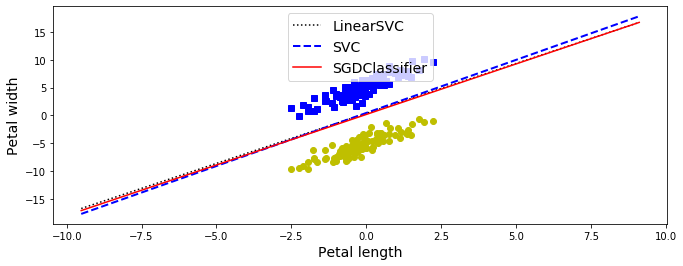

In [8]:
# Compute the slope and bias of each decision boundary
w1 = -linear_svc_clf[1].coef_[0, 0]/linear_svc_clf[1].coef_[0, 1]
b1 = -linear_svc_clf[1].intercept_[0]/linear_svc_clf[1].coef_[0, 1]
w2 = -svc_clf[1].coef_[0, 0]/svc_clf[1].coef_[0, 1]
b2 = -svc_clf[1].intercept_[0]/svc_clf[1].coef_[0, 1]
w3 = -sgd_clf[1].coef_[0, 0]/sgd_clf[1].coef_[0, 1]
b3 = -sgd_clf[1].intercept_[0]/sgd_clf[1].coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = linear_svc_clf[0].inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = svc_clf[0].inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = sgd_clf[0].inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bs") 
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "yo") 
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)